In [64]:
%matplotlib inline
import pandas as pd
from matplotlib import style
import matplotlib.pyplot as plt
style.use('Solarize_Light2')

In [2]:
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
from nltk import collocations
from nltk.stem import WordNetLemmatizer

In [31]:
from wordcloud import WordCloud
import random
from collections import Counter

In [4]:
#import csv
data = pd.read_csv('review_new.csv')

In [5]:
review_data = data['review']
review_data.head()

0    As with Boys Over Flowers, I am almost afraid ...
1    READ THIS IF YOU WANT A UNIQUE PERSPECTIVE OF ...
2    1-The reason I watched this : As a huge fan of...
3    I wasn't intending to watch another version of...
4    Funny how there's nothing really special about...
Name: review, dtype: object

In [6]:
stopWords = set(stopwords.words('English'))

In [7]:
filteredWords = []

for review in review_data:
    words = word_tokenize(review.lower())
    
    for word in words:
        if word not in stopWords:
            if(word.isalpha()):
                filteredWords.append(word)

In [8]:
lemmatizer = WordNetLemmatizer()
lem_wordlist = []
for word in filteredWords:
    lem_word = lemmatizer.lemmatize(word)
    if(lem_word == 'watched'):
           lem_word = 'watch'
            
    if(lem_word == 'mom'):
        lem_word = 'mother'
        
    lem_wordlist.append(lem_word)

In [51]:
#frequent_wordList = FreqDist(filteredWords)
frequent_wordList = FreqDist(lem_wordlist)
frequent_df = pd.DataFrame(list(frequent_wordList.most_common(10)), columns=['words', 'freq'])
frequent_df_f = frequent_df.iloc[[0,2,4,5], [0,1]]
frequent_df_f

,words,freq
0,drama,255
2,watch,137
4,character,98
5,story,97


In [10]:
# convert tuple to string function
def convert_tuple(list_convert):
    wordlist = []
    for num, item in enumerate(list_convert):
        word = ''
    
        if num == len(list_convert):
            word = word.join(item)
        else:
            word = word.join(str(i) + ' ' for i in item)
        
        wordlist.append(word)

    return wordlist

In [11]:
# frequent 2 words phrases
#bigram_finder = collocations.BigramCollocationFinder.from_words(filteredWords)
bigram_finder = collocations.BigramCollocationFinder.from_words(lem_wordlist)
bigram_finder.ngram_fd.most_common(20)
bigram_df = pd.DataFrame(list(bigram_finder.ngram_fd.most_common(20)), columns=['words', 'freq'])

In [12]:
bigram_df_f = bigram_df.iloc[[0,1,2,6,7,8,9,12,13,15,16,17,19], [0,1]]

bigram_df_f.words = convert_tuple(bigram_df_f.words)    
bigram_df_f

,words,freq
0,ha ni,91
1,hyun joong,58
2,seung jo,55
6,playful kiss,30
7,jung min,20
8,female lead,20
9,male lead,20
12,joon gu,15
13,boy flower,13
15,watch drama,13


In [13]:
bigram_df_f.words[16] = bigram_df_f.words[15]
bigram_df_f = bigram_df_f.groupby(by='words').sum()
bigram_df_f.reset_index(inplace=True)
bigram_df_f

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,words,freq
0,boy flower,13
1,female lead,20
2,ha ni,91
3,high school,9
4,hyun joong,58
5,joon gu,15
6,jung min,20
7,like drama,10
8,male lead,20
9,playful kiss,30


In [14]:
#trigram_finder = collocations.TrigramCollocationFinder.from_words(filteredWords)
trigram_finder = collocations.TrigramCollocationFinder.from_words(lem_wordlist)
trigram_finder.ngram_fd.most_common(10)
trigram_df = pd.DataFrame(list(trigram_finder.ngram_fd.most_common(10)), columns=['words', 'freq'])
trigram_df_f = trigram_df.iloc[[3,5,6,9], [0,1]]

In [15]:
trigram_df_f.words = convert_tuple(trigram_df_f.words)
trigram_df_f

,words,freq
3,itazura na kiss,18
5,seung jo mother,6
6,worst drama ever,4
9,ha ni friend,3


In [16]:
#quagram_finder = collocations.QuadgramCollocationFinder.from_words(filteredWords)
quagram_finder = collocations.QuadgramCollocationFinder.from_words(lem_wordlist)
quagram_finder.ngram_fd.most_common(7)

[(('loved', 'kim', 'hyun', 'joong'), 3),
 (('story', 'itazura', 'na', 'kiss'), 3),
 (('drama', 'kim', 'hyun', 'joong'), 3),
 (('kim', 'hyun', 'joong', 'jung'), 3),
 (('hyun', 'joong', 'jung', 'min'), 3),
 (('kim', 'hyun', 'joong', 'attractive'), 2),
 (('especially', 'baek', 'seung', 'jo'), 2)]

In [52]:
final_df = bigram_df_f.append(trigram_df_f).append(frequent_df_f).sort_values('freq', ascending=False)
final_df.reset_index(inplace=True)
final_df

,index,words,freq
0,0,drama,255
1,2,watch,137
2,4,character,98
3,5,story,97
4,2,ha ni,91
5,4,hyun joong,58
6,10,seung jo,55
7,9,playful kiss,30
8,11,watch drama,25
9,8,male lead,20


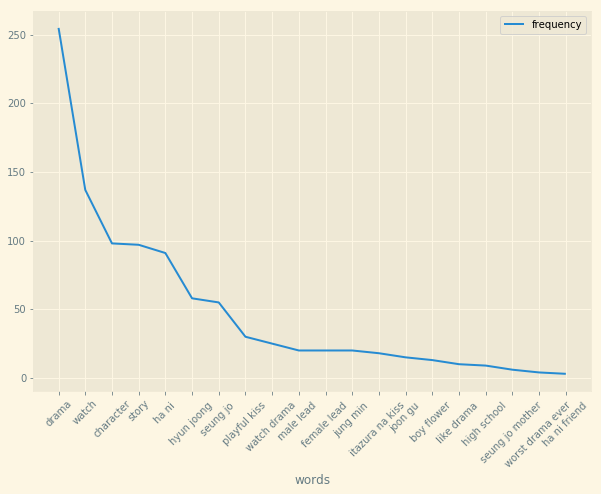

In [66]:
word_freq = final_df.plot(kind='line', x='words', y='freq', figsize=(10,7), xticks=final_df.index, rot=45)
plt.legend(['frequency'])
word_freq.get_figure().savefig("../../images/word_freq.png", bbox_inches="tight")

In [34]:
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(70, 100)

In [61]:
# generate word cloud image
word_cloud_list = Counter(final_df.words)
word_graph = WordCloud(background_color="white", max_font_size=400, width=1000, height=700)
word_graph.generate_from_frequencies(word_cloud_list)

In [63]:
plt.figure(figsize=(14,8))
plt.imshow(word_graph,interpolation="bilinear")
plt.axis("off")
plt.savefig('../../images/word_cloud.png', bbox_inches='tight')
plt.close()